# Module 2- Plotting in Financial Markets


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 2.1 
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.

>Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock

>This would be helpful if we are to train our model to take NLP inputs.

In [12]:
# Importing Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import math
import os 
import re

dataset = pd.read_csv("week2.csv")

# rcParams is used to resize the figures to make them more readable

plt.rcParams['figure.figsize'] = (10,6)


QUERY 2.1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             502 non-null    int64         
 1   Date                   502 non-null    datetime64[ns]
 2   Close Price            502 non-null    float64       
 3   Open Price             502 non-null    float64       
 4   High Price             502 non-null    float64       
 5   Low Price              502 non-null    float64       
 6   Total Traded Quantity  502 non-null    float64       
 7   Day_Perc_Change        502 non-null    float64       
 8   Trend                  502 non-null    object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 35.4+ KB


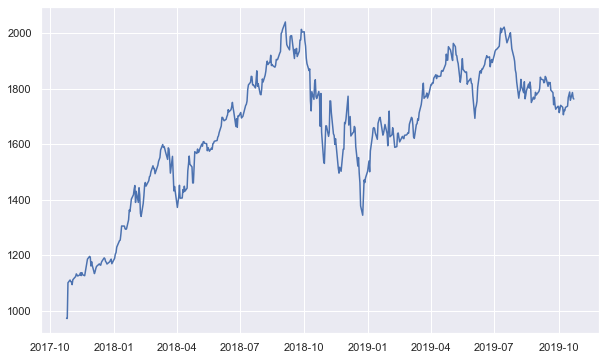

In [13]:
# Converting datatype of date to datetime and setting it as the index
dataset['Date'] = dataset['Date'].astype('datetime64[ns]')
dataset.info()
dataset.set_index('Date',inplace = True ,drop = False)
x = dataset['Date']
y = dataset['Close Price']
plt.plot(x,y)


In [14]:
dataset['Close Price'].diff().abs().sort_values(ascending = False)
# Stored this data in a csv file and analyzed each cell and found that the top 9 closing price 
# differences are significant and hence can be considered as drastic change days.
# The differences above 100 were considered to be a significant change.
# The news for the pages can be extracted using BeautifulSoup library.

Date
2018-10-25    139.36
2017-10-26    128.52
2018-12-24    126.94
2018-10-24    117.97
2018-10-09    115.07
               ...  
2018-09-12      0.13
2018-11-26      0.09
2018-04-24      0.08
2018-11-01      0.00
2019-10-23       NaN
Name: Close Price, Length: 502, dtype: float64

QUERY 2.2

<StemContainer object of 3 artists>

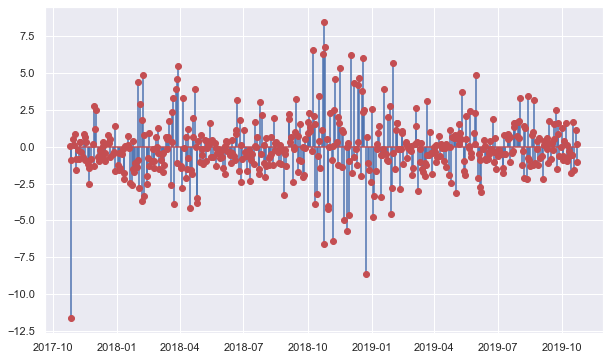

In [15]:
y1 = dataset['Day_Perc_Change']
plt.stem(x , y1 , markerfmt = 'ro')

QUERY 2.3

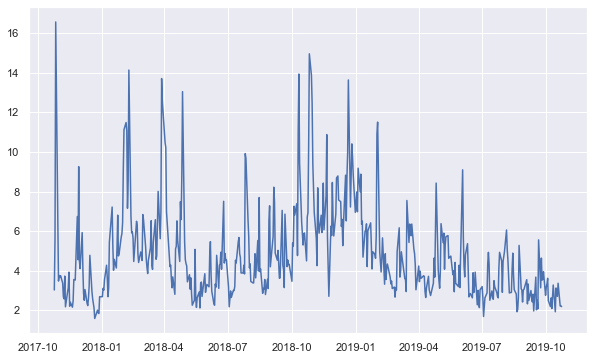

In [16]:
y2 = dataset['Total Traded Quantity']
plt.plot(x , y2 )

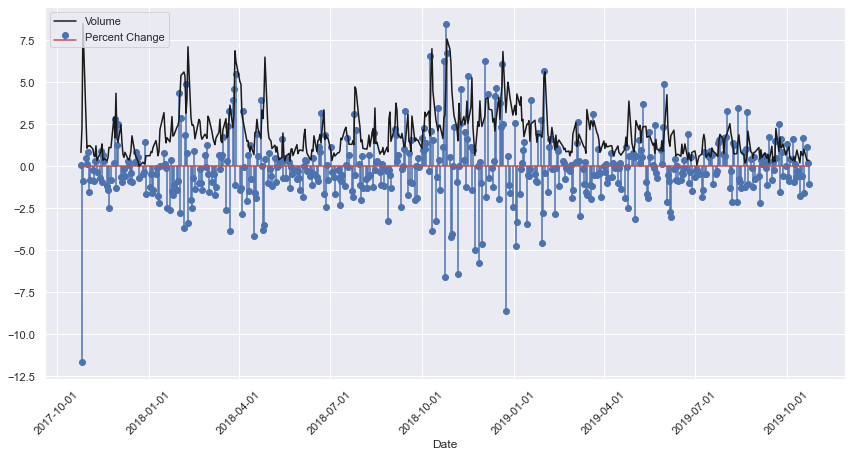

In [17]:
sns.set(style="darkgrid")

scaledvolume =  dataset["Total Traded Quantity"] - dataset["Total Traded Quantity"].min()
scaledvolume = scaledvolume/scaledvolume.max() * dataset.Day_Perc_Change.max()

fig, ax = plt.subplots(figsize=(12, 6))

ax.stem(dataset.index, dataset.Day_Perc_Change , 'b', markerfmt='bo', label='Percent Change')
ax.plot(dataset.index, scaledvolume, 'k', label='Volume')

ax.set_xlabel('Date')
plt.legend(loc=2)

plt.tight_layout()
plt.xticks(plt.xticks()[0], rotation=45)
plt.show()

It can be observed that whenever there is a spike in the percentage change be it positive or negative there is a corresponding increase in the Volume / Total Traded Quantity which means that Close Price influences the change in of the total traded quantity.

QUERY 2.4

([<matplotlib.patches.Wedge at 0x151c1879f60>,
 [Text(2.6984111478892276, 0.530167216024473, 'Among top gainers'),
  Text(2.3786963390544895, 1.3799651178811616, 'Among top losers'),
  Text(2.1454301532959814, 1.7203573632615936, 'Bear drop'),
  Text(2.112755172709001, 1.7603310995921648, 'Bull run'),
  Text(0.4963523053153744, 2.7048353718864506, 'Negative'),
  Text(-2.1982025984767097, 1.6523938199019748, 'Positive'),
  Text(-2.6766065114212165, -0.6310923728088826, 'Slight negative'),
  Text(0.051627114400764194, -2.7495153465763105, 'Slight or No change'),
  Text(2.6056671580284463, -0.8792034244541814, 'Slight positive')],
 [Text(1.471860626121397, 0.2891821178315307, '6.2%'),
  Text(1.297470730393358, 0.7527082461169973, '4.4%'),
  Text(1.1702346290705352, 0.9383767435972328, '0.4%'),
  Text(1.1524119123867278, 0.9601805997775446, '0.2%'),
  Text(0.2707376210811133, 1.4753647483017003, '21.9%'),
  Text(-1.1990195991691146, 0.9013057199465317, '13.3%'),
  Text(-1.4599671880479361,

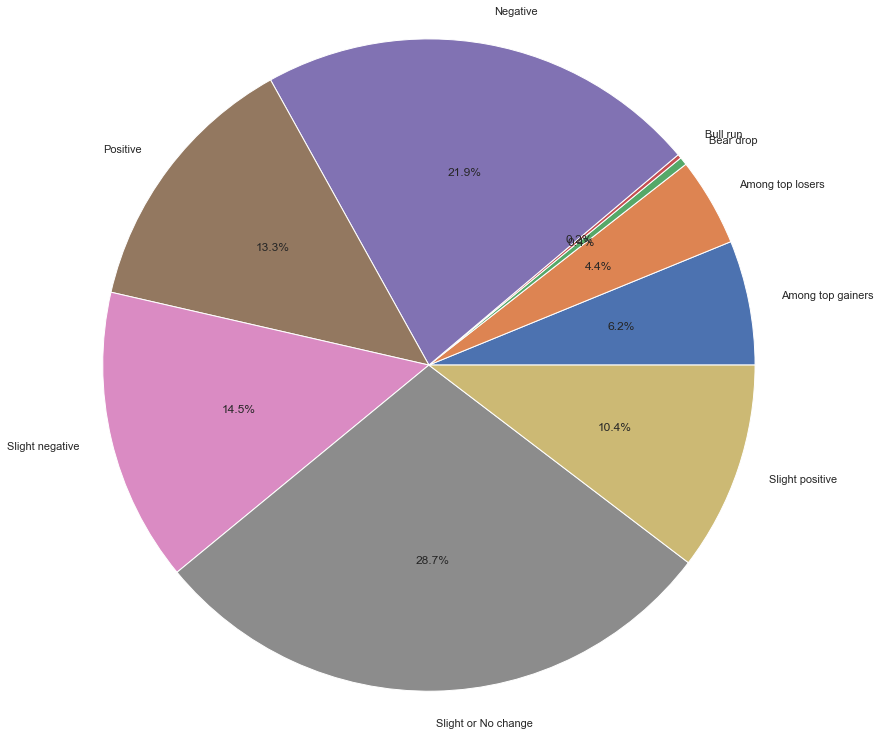

In [36]:
pie_data = dataset.groupby('Trend')
pie_label = sorted([i for i in dataset.loc[: , 'Trend'].unique()])
plt.pie(pie_data['Trend'].count(), labels= pie_label,autopct= '%1.1f%%', radius= 2.5 )


QUERY 2.5

                     count       mean       std    min      25%     50%  \
Trend                                                                     
Among top gainers     31.0   6.445161  2.624387   2.66   4.8650   6.020   
Among top losers      22.0   7.190000  3.421715   2.71   4.6750   6.515   
Bear drop              2.0   6.420000  1.131371   5.62   6.0200   6.420   
Bull run               1.0  10.290000       NaN  10.29  10.2900  10.290   
Negative             110.0   4.891727  2.233298   1.93   3.2350   4.385   
Positive              67.0   5.060746  2.513169   1.84   3.1800   4.520   
Slight negative       73.0   4.368082  2.052755   1.59   3.1100   3.810   
Slight or No change  144.0   4.181944  1.870753   1.69   2.8975   3.680   
Slight positive       52.0   4.620192  2.145382   2.04   3.1850   4.265   

                         75%    max  
Trend                                
Among top gainers     6.7900  14.96  
Among top losers      9.0850  14.14  
Bear drop             

<AxesSubplot:xlabel='Trend'>

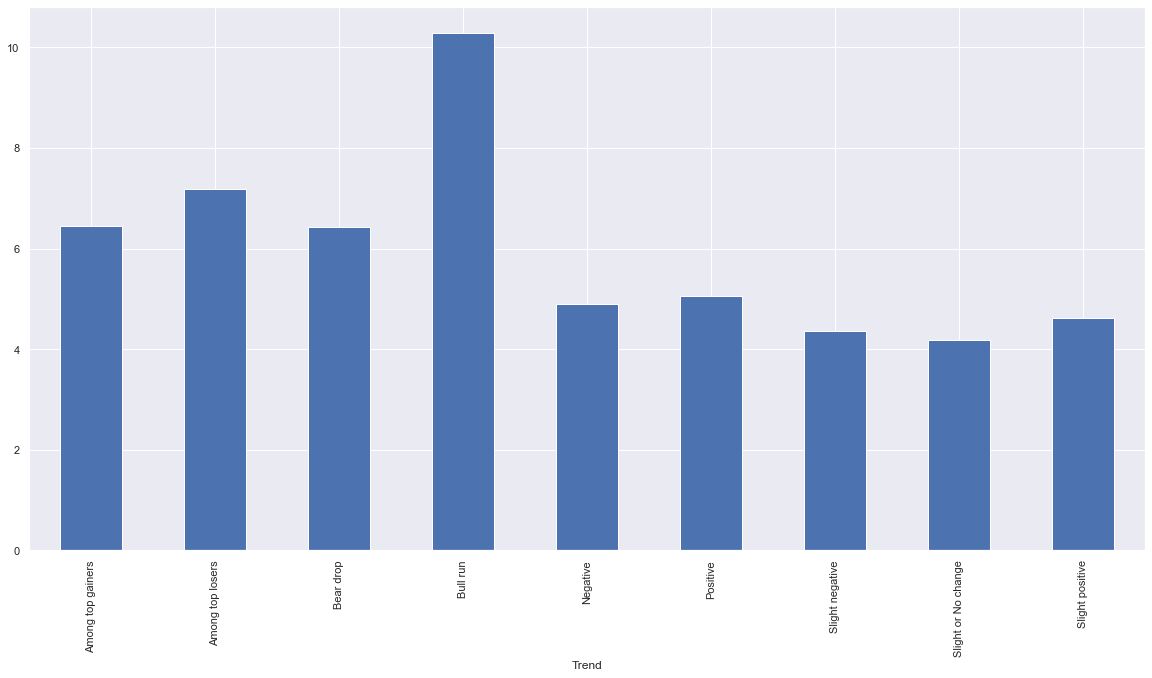

In [22]:
# Grouping on the basis of Trend

gk = dataset.groupby(['Trend'])['Total Traded Quantity']
print(gk.describe())

plt.figure(figsize=(20,10))
dataset.groupby(['Trend'])['Total Traded Quantity'].mean().plot.bar()

Text(0.5, 1.0, 'Median of "Total Traded Quantity" by Trend type')

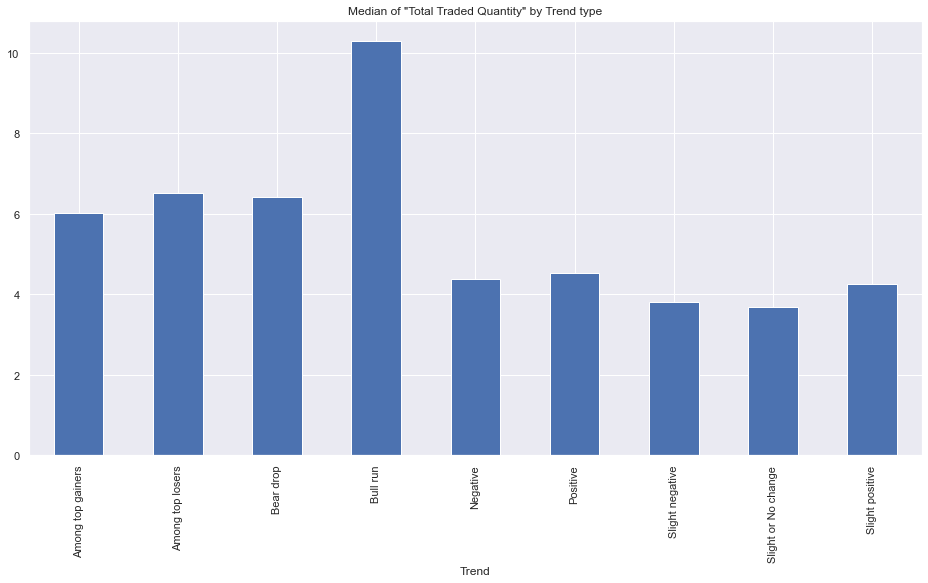

In [42]:
plt.figure(figsize=(16,8))
dataset.groupby(dataset['Trend'])['Total Traded Quantity'].median().plot.bar()
plt.title('Median of "Total Traded Quantity" by Trend type')

Text(0.5, 1.0, 'Daily Return (Percentage) Distribution')

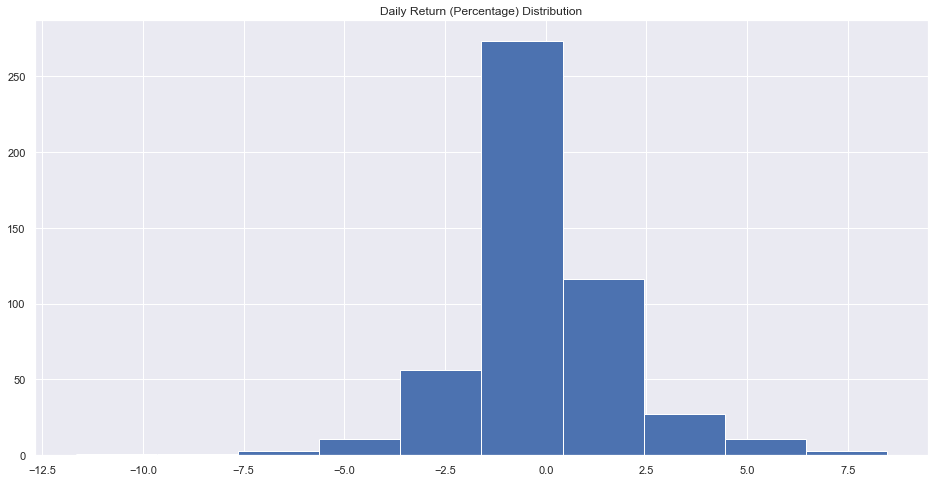

In [43]:
plt.figure(figsize=(16,8))
plt.hist(dataset['Day_Perc_Change'])
plt.title('Daily Return (Percentage) Distribution')

QUERY 2.6

In [47]:
# Loading the 5 datasets for review
gmr_data = pd.read_csv('GMRINFRA.csv')
tcs_data = pd.read_csv('TCS.csv')
itc_data = pd.read_csv('ITC.csv')
idbi_data = pd.read_csv('IDBI.csv')
apollo_data = pd.read_csv('APOLLOTYRE.csv')

In [48]:
filter_itc = itc_data[itc_data.Series == 'EQ']
filter_gmr = gmr_data[gmr_data.Series == 'EQ']
filter_tcs = tcs_data[tcs_data.Series == 'EQ']
filter_idbi = idbi_data[idbi_data.Series == 'EQ']
filter_apollo = apollo_data[apollo_data.Series == 'EQ']

# Putting the Close Prices from all the datasets together

columns = ['ITC','GMRINFRA','TCS','IDBI','APOLLOTYRE']
close_prices_dataFrame = pd.DataFrame(columns = columns)
close_prices_dataFrame['ITC'] = filter_itc['Close Price']
close_prices_dataFrame['GMRINFRA'] = filter_gmr['Close Price']
close_prices_dataFrame['TCS'] = filter_tcs['Close Price']
close_prices_dataFrame['IDBI'] = filter_idbi['Close Price']
close_prices_dataFrame['APOLLOTYRE'] = filter_apollo['Close Price']
close_prices_dataFrame.dropna()

,ITC,GMRINFRA,TCS,IDBI,APOLLOTYRE
0,277.95,17.55,2365.10,75.05,231.90
1,283.45,17.40,2429.15,76.65,234.40
2,281.65,17.30,2455.35,75.95,237.35
3,277.90,16.75,2536.20,69.95,232.65
4,286.20,16.95,2507.15,68.75,234.65
...,...,...,...,...,...
489,304.25,16.00,2260.35,37.25,195.20
490,307.00,15.85,2215.40,37.05,191.75
491,301.90,16.05,2132.00,37.45,185.30
492,300.65,16.10,2157.85,37.25,190.95


In [49]:
pct_change_dataFrame = close_prices_dataFrame.pct_change().fillna(0)
pct_change_dataFrame.dropna()

,ITC,GMRINFRA,TCS,IDBI,APOLLOTYRE
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.019788,-0.008547,0.027081,0.021319,0.010781
2,-0.006350,-0.005747,0.010786,-0.009132,0.012585
3,-0.013314,-0.031792,0.032928,-0.078999,-0.019802
4,0.029867,0.011940,-0.011454,-0.017155,0.008597
...,...,...,...,...,...
491,-0.016612,0.012618,-0.037646,0.010796,-0.033638
492,-0.004140,0.003115,0.012125,-0.005340,0.030491
493,-0.002661,-0.049689,-0.002734,-0.075168,-0.024876
494,-0.007004,0.000000,0.000418,0.000000,0.000000


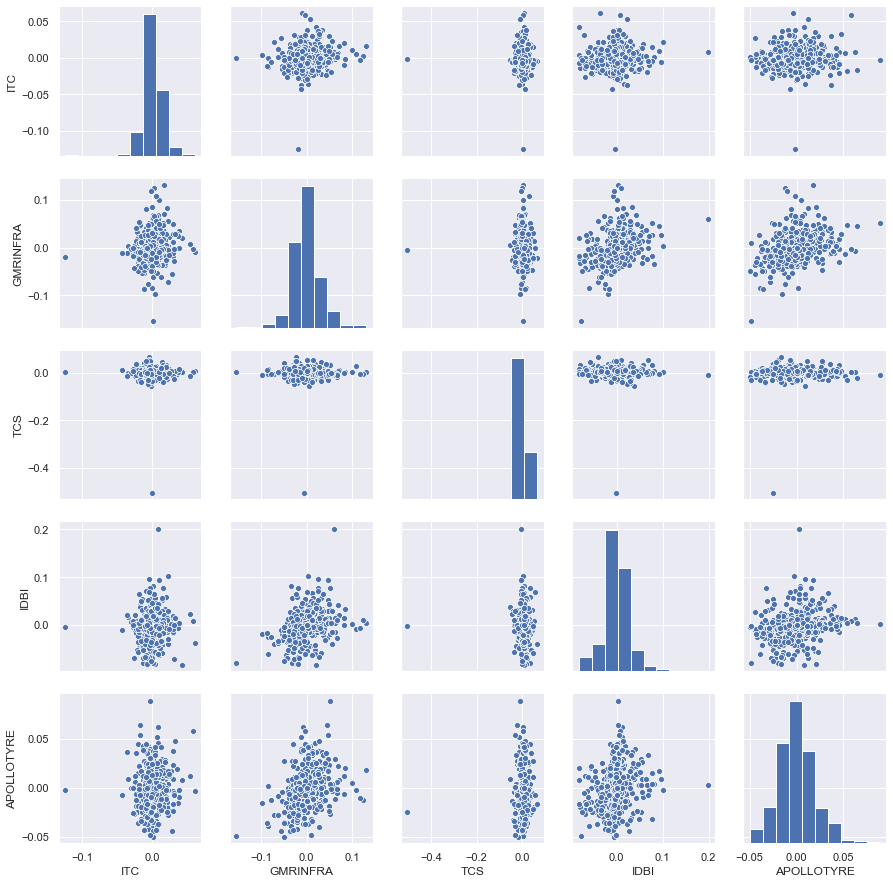

In [50]:
sns.set(color_codes=True)
sns.pairplot(pct_change_dataFrame)

QUERY 2.7

In [51]:
rolling_avg_itc = pct_change_dataFrame['ITC'].rolling(7).mean()
rolling_avg_itc

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
491   -0.002088
492   -0.001608
493   -0.002176
494   -0.001675
495   -0.007460
Name: ITC, Length: 494, dtype: float64

In [52]:
stand_itc = rolling_avg_itc.fillna(0).std()
stand_itc

0.005101661617083944

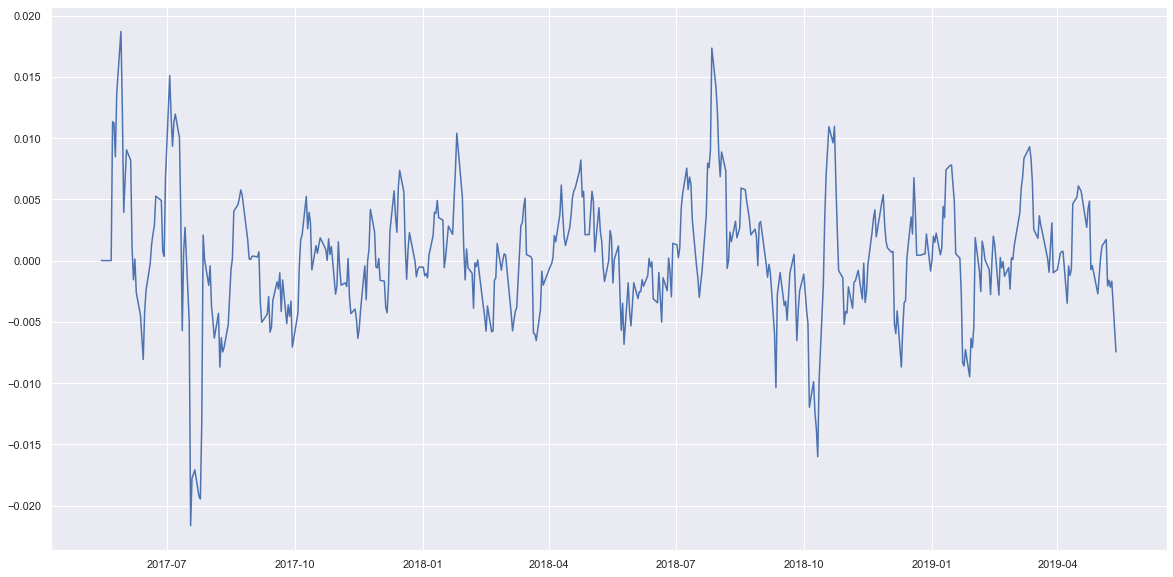

In [53]:
crrDate = pd.to_datetime(filter_itc['Date'])
crrLis = crrDate.tolist()
plt.figure(figsize=(20,10))
plt.plot(crrLis,rolling_avg_itc.fillna(0).tolist())
plt.show()

QUERY 2.8

In [55]:
nif_load = pd.read_csv('Nifty50.csv')
nif_load.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


<Figure size 1440x720 with 0 Axes>

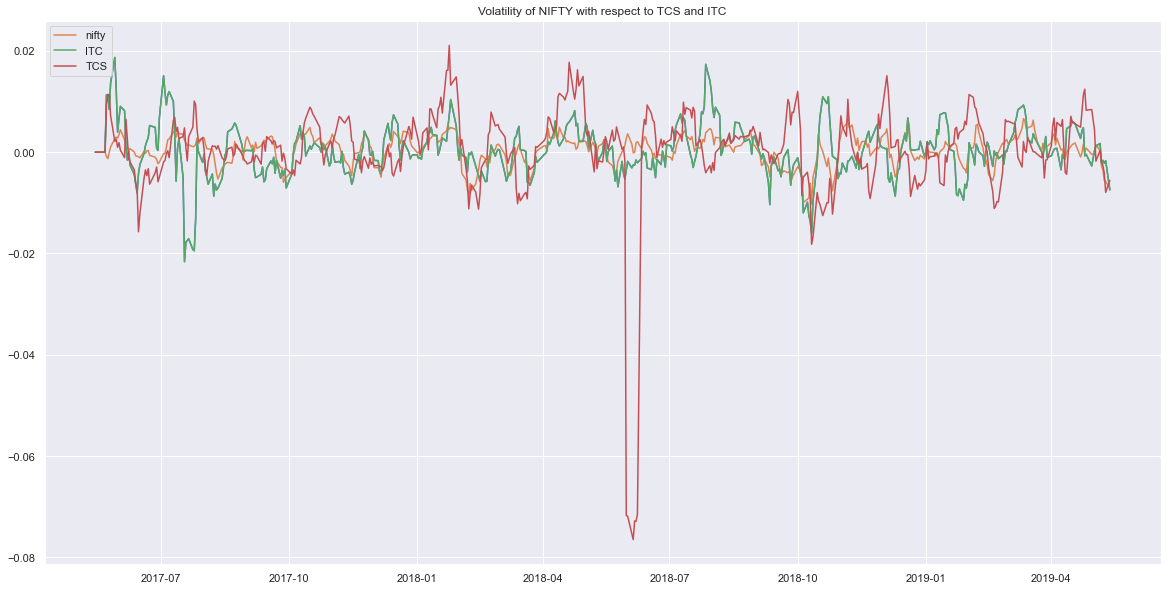

In [56]:
nif_close_price = nif_load['Close']
nif_change = nif_close_price.pct_change().fillna(0).rolling(7).mean().fillna(0)
nifDate = pd.to_datetime(nif_load['Date'])
nifDate = nifDate.tolist()
plt.figure(figsize=(20,10))

tcs_Date = pd.to_datetime(filter_tcs['Date'])
tcsLis = tcs_Date.tolist()
tcs_close_price = filter_tcs['Close Price']
tcs_change = tcs_close_price.pct_change().fillna(0).rolling(7).mean().fillna(0)
plt.figure(figsize=(20,10))
plt.plot(tcsLis,rolling_avg_itc.fillna(0).tolist())

plt.title("Volatility of NIFTY with respect to TCS and ITC")
plt.plot(nifDate,nif_change.tolist(),label = 'nifty')
plt.plot(crrLis,rolling_avg_itc.fillna(0).tolist(),label = 'ITC')
plt.plot(tcsLis,tcs_change,label = 'TCS')
plt.legend(loc='upper left')
plt.show()

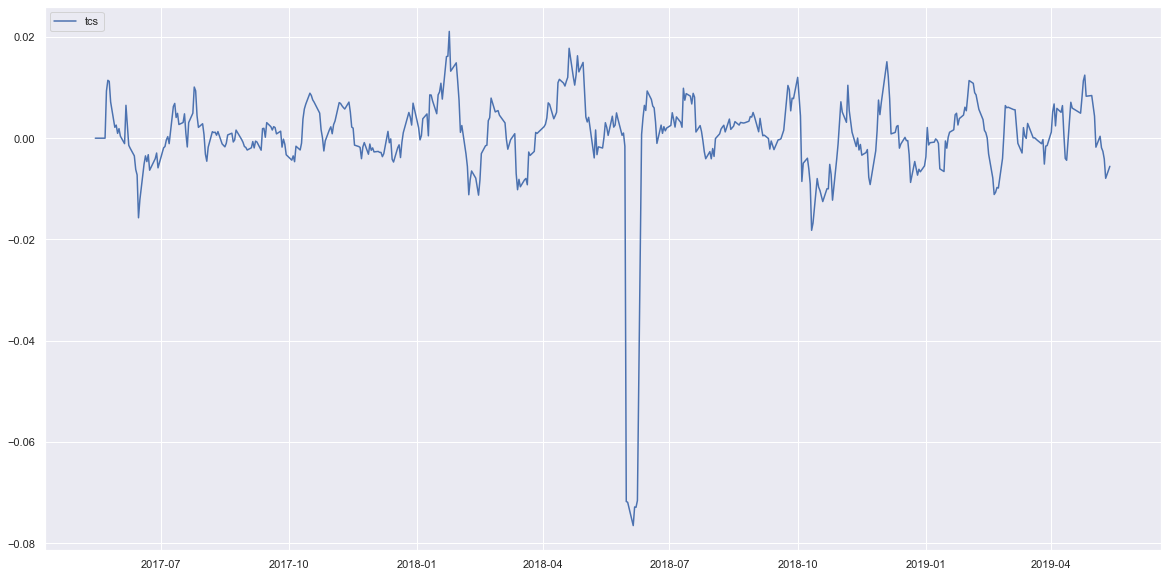

In [57]:
plt.figure(figsize=(20,10))
plt.plot(tcsLis,tcs_change,label = 'tcs')
plt.legend(loc='upper left')
plt.show()

QUERY 2.9

In [58]:
# Making short and long signals
short_window = 21
long_window = 34

signals = pd.DataFrame(index=filter_tcs.index)
signals['signal'] = 0.0

# SMA of Short Window
signals['short_mavg'] = filter_tcs['Close Price'].rolling(window=short_window, min_periods=1,center=False).mean()

# SMA of Long Window
signals['long_mavg'] = filter_tcs['Close Price'].rolling(window=long_window,min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0,0.0)

# Generate trading orders
signals['positions'] = signals['signal'].diff()
print(signals)


     signal   short_mavg    long_mavg  positions
0       0.0  2365.100000  2365.100000        NaN
1       0.0  2397.125000  2397.125000        0.0
2       0.0  2416.533333  2416.533333        0.0
3       0.0  2446.450000  2446.450000        0.0
4       0.0  2458.590000  2458.590000        0.0
..      ...          ...          ...        ...
493     1.0  2124.990476  2081.357353        0.0
494     1.0  2128.492857  2086.223529        0.0
495     1.0  2136.019048  2090.123529        0.0
496     1.0  2140.185714  2093.447059        0.0
497     1.0  2142.947619  2096.563235        0.0

[494 rows x 4 columns]


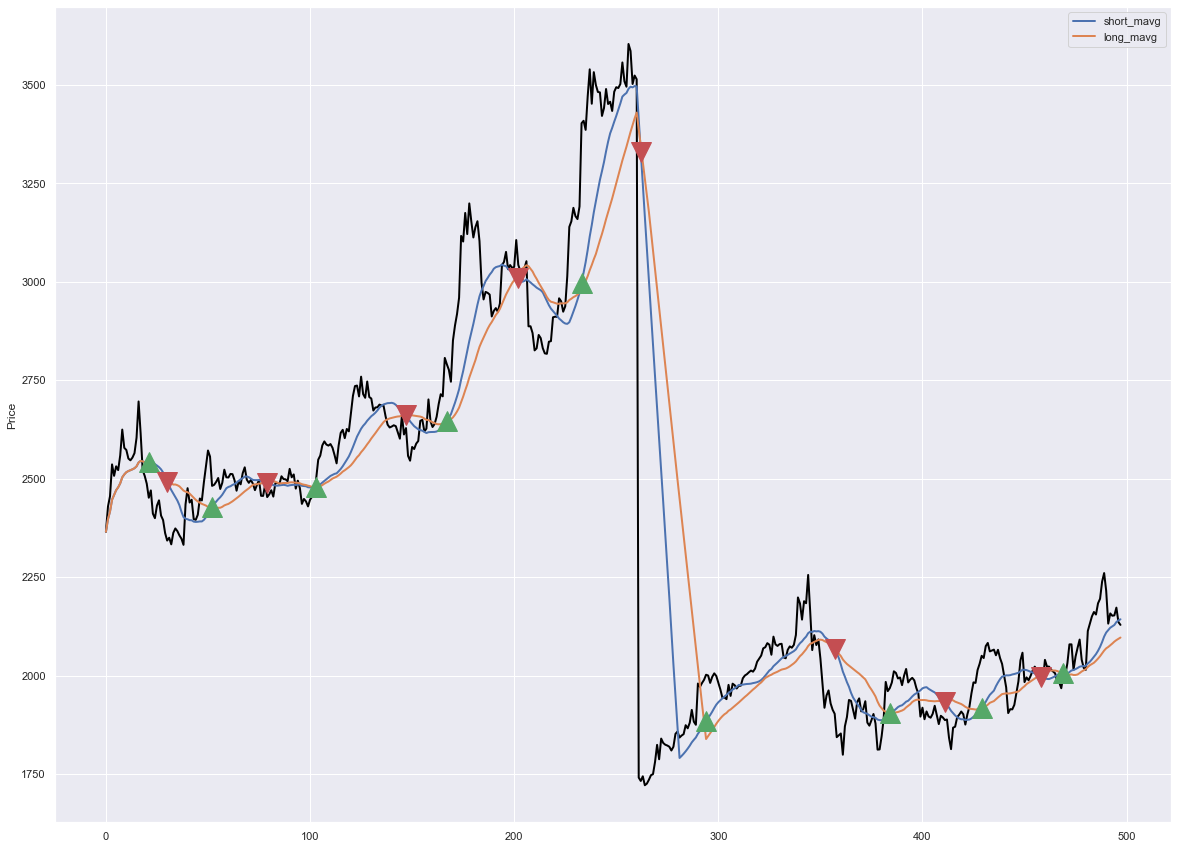

In [59]:
# Initialize the plot figure
fig = plt.figure(figsize=(20,15))

#Add a subplot and label for y-axis
ax1 = fig.add_subplot(111, ylabel='Price')

#Plot the closing price
filter_tcs['Close Price'].plot(ax=ax1, color='black', lw=2.)

#plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

#Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, signals.short_mavg[signals.positions == 1.0], '^' , markersize=20,color='g')

#Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, signals.short_mavg[signals.positions == -1.0], 'v' , markersize=20,color='r')

plt.show()

QUERY 2.10

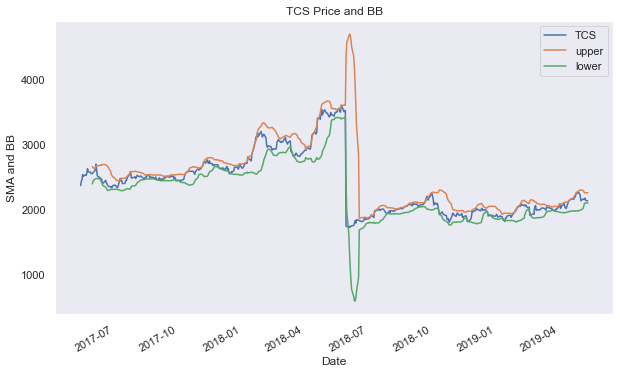

In [61]:
symbol = 'TCS'

df = pd.read_csv('TCS.csv'.format(symbol), index_col='Date',
                 parse_dates=True, usecols=['Date', 'Close Price'],
                 na_values='nan')

# Renaming the column header with symbol name
df = df.rename(columns={'Close Price': symbol})
df.dropna(inplace=True)

# Calculating Simple Moving Average with 14 days window
sma = df.rolling(window=14).mean()

# Calculating the Standard Deviation
rstd = df.rolling(window=14).std()

upper_band = sma + 2 * rstd
upper_band = upper_band.rename(columns={symbol: 'upper'})
lower_band = sma - 2 * rstd
lower_band = lower_band.rename(columns={symbol: 'lower'})
df = df.join(upper_band).join(lower_band)
ax = df.plot(title='{} Price and BB'.format(symbol))
ax.set_xlabel('Date')
ax.set_ylabel('SMA and BB')
ax.grid()
plt.show()

In [62]:
dataset.to_csv('week3.csv')